## Lineplots
Lineplots usually connect values by time. Users often need to specify groups\
and do some data preparation to ensure separate lines are drawn\
Replace _ to complete expressions and return the correct answer\
Restart R to remove previous results using: Ctrl/Cmd + shift + F1\
Remember - try to use google to help you answer question\
data |> \
ggplot(aes(x = x_variable, y = y_variable, group = group_column)) +\
geom_line(\
Load the tidyverse package


In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1. Line plots
madrid-weather-monthly-2010-2020.csv contains daily temperature, humidity and\
precipitation every two years from 2010 to 2020.\
We want to create a plot of monthly mean temperature across different years.

#### 1.1 Import madrid-weather-monthly-2010-2020.csv from teh data folder

In [4]:
madrid_weather <- readr::read_csv(file = '../data/madrid-weather-monthly-2010-2020.csv')

Rows: 2193 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): year, month, day, Temperature_C, Humidity_pct, Precipitation_mm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Examine the first 10 rows of the data

In [6]:
madrid_weather |> head(n = 10)

year,month,day,Temperature_C,Humidity_pct,Precipitation_mm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,1,1,5,85,1.2
2010,1,2,5,90,0.0
2010,1,3,4,95,8.9
2010,1,4,6,96,24.4
2010,1,5,8,91,4.2
2010,1,6,4,86,0.5
2010,1,7,1,89,7.5
2010,1,8,0,67,0.7
2010,1,9,-1,70,0.5


Create a new dataset that is the mean temperature by year and month\
That is, summarise Temperature_C by year and month.

In [7]:
madrid_weather_monthly <-
  madrid_weather |>
  group_by(year, month) |>
  summarise(
    mean_temp = mean(Temperature_C, na.rm = TRUE)
  )

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


#### 1.2 Create a line plot
Create a line plot of monthly temperatures for each year in the dataset\
use the group= argument to create different lines

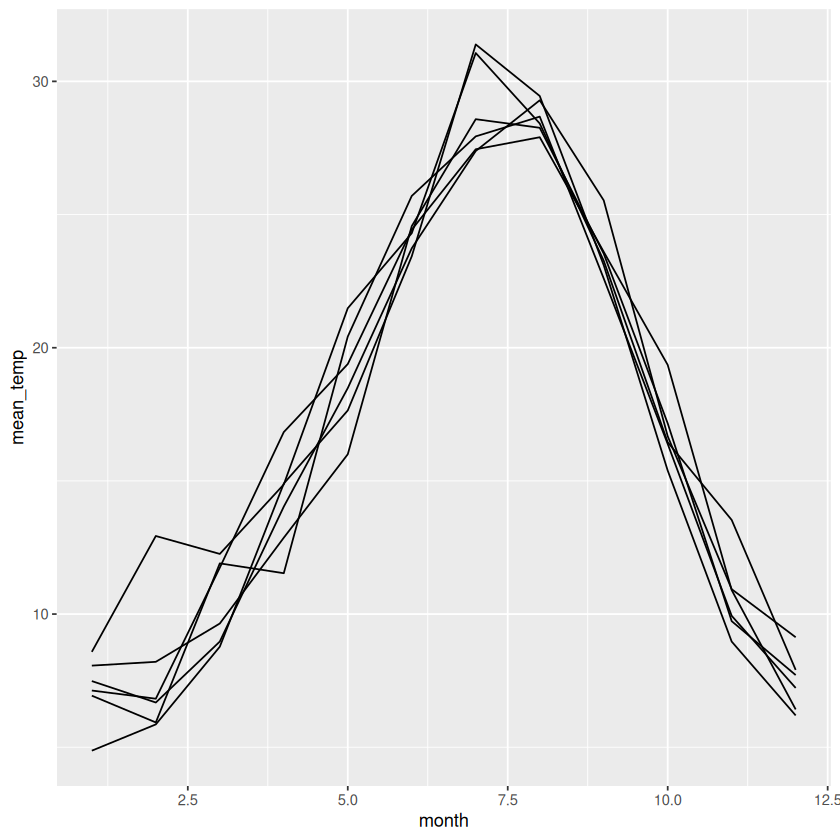

In [13]:
madrid_weather_monthly |>
    ggplot(aes(x = month, y = mean_temp, group = year)) +
    geom_line()

Try using the colour aesthetic instead of group

Rows: 72
Columns: 3
Groups: year [6]
$ year      <dbl> 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, …
$ month     <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ mean_temp <dbl> 4.870968, 5.857143, 8.774194, 14.900000, 17.645161, 23.43333…


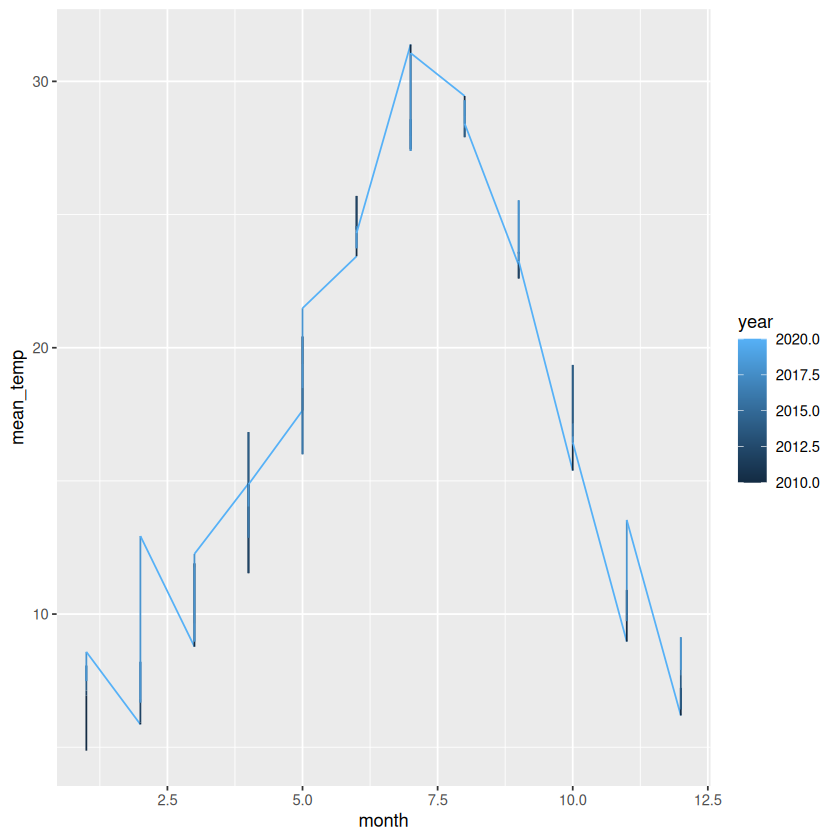

In [14]:
glimpse(madrid_weather_monthly)
madrid_weather_monthly |>
    ggplot(aes(x = month, y = mean_temp, colour = year)) +
    geom_line()

Is the result what you were expecting?\
***-> No, it represents all the years in the same series***\
What type of column is year?\
***-> It is <dbl> type. It should be <int> or <chr>***\
How can you make a grouping data type from a column like year that has numbers?\
***->By turning it into a factor type.***

In [15]:
madrid_weather_monthly <-
    madrid_weather_monthly |>
    mutate(year = factor(year))

Rows: 72
Columns: 3
Groups: year [6]
$ year      <fct> 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, …
$ month     <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ mean_temp <dbl> 4.870968, 5.857143, 8.774194, 14.900000, 17.645161, 23.43333…


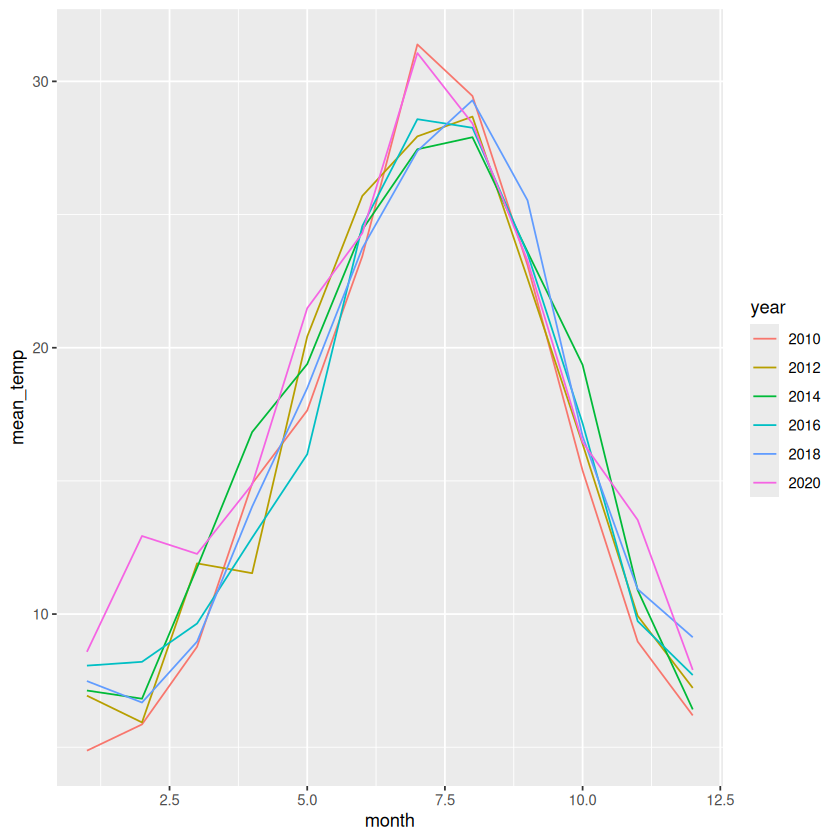

In [16]:
glimpse(madrid_weather_monthly)
madrid_weather_monthly |>
    ggplot(aes(x = month, y = mean_temp, colour = year)) +
    geom_line()

#### 1.3 Edit the x axis breaks
We want to make the values on the x axis the numbers of the month\
Use scale_x_continuous() to update the "breaks" to be 1 to 12.

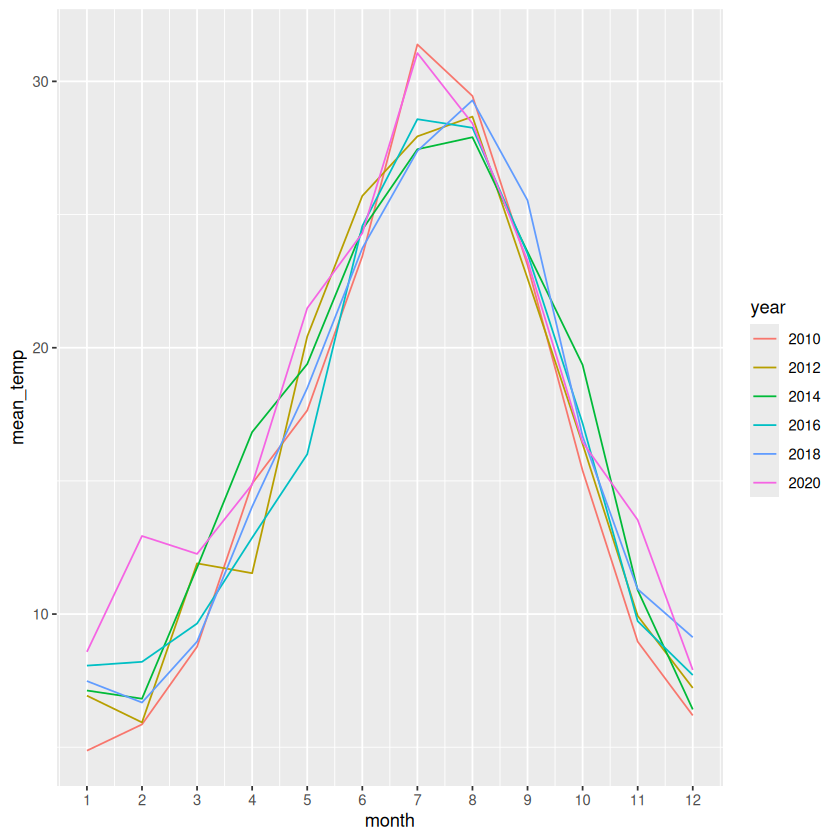

In [22]:
madrid_weather_monthly |>
  ggplot(aes(x = month, y = mean_temp, colour = year)) +
  geom_line() +
  scale_x_continuous(breaks = seq(from = 1, to = 12, by = 1))

#### 1.4 Change the x axis labels
We can further provide what values should go at the 12 axis breaks\
R includes some vectors "constants", including the names of the months\
?Constants\
Update scale_x_continuous to include the labels argument with the month.abb vector\
This will put the values of month.abb at the given breaks

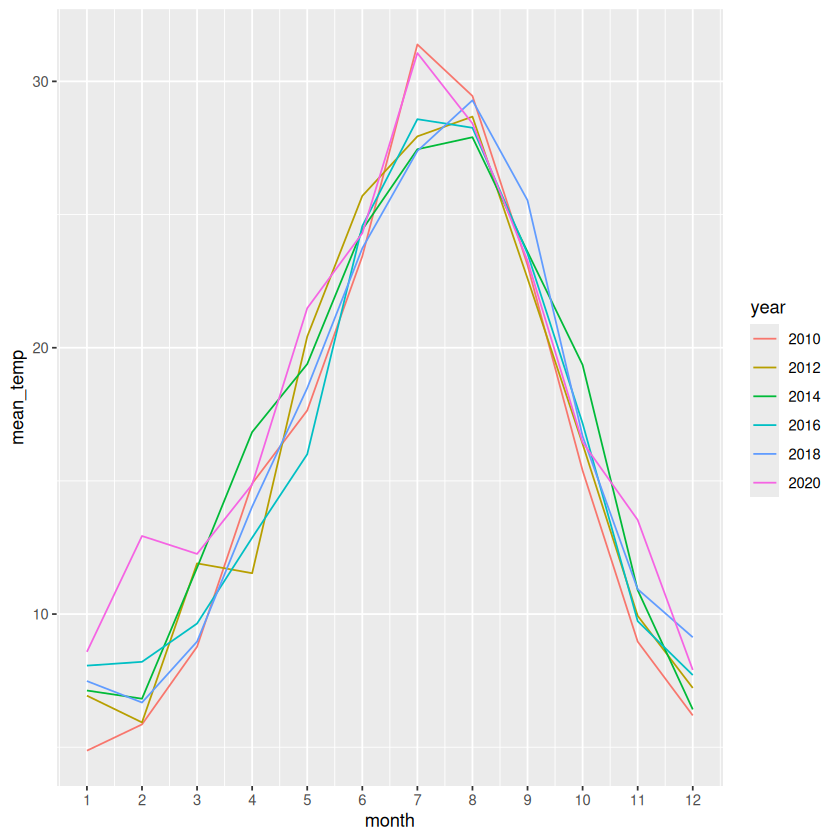

In [23]:
madrid_weather_monthly %>% 
  ggplot(aes(x = month, y = mean_temp, colour = year)) +
  geom_line() +
  scale_x_continuous(breaks = seq(month.abb))

#### 1.5 Finalise the plot
Update the labels for x, y and colour

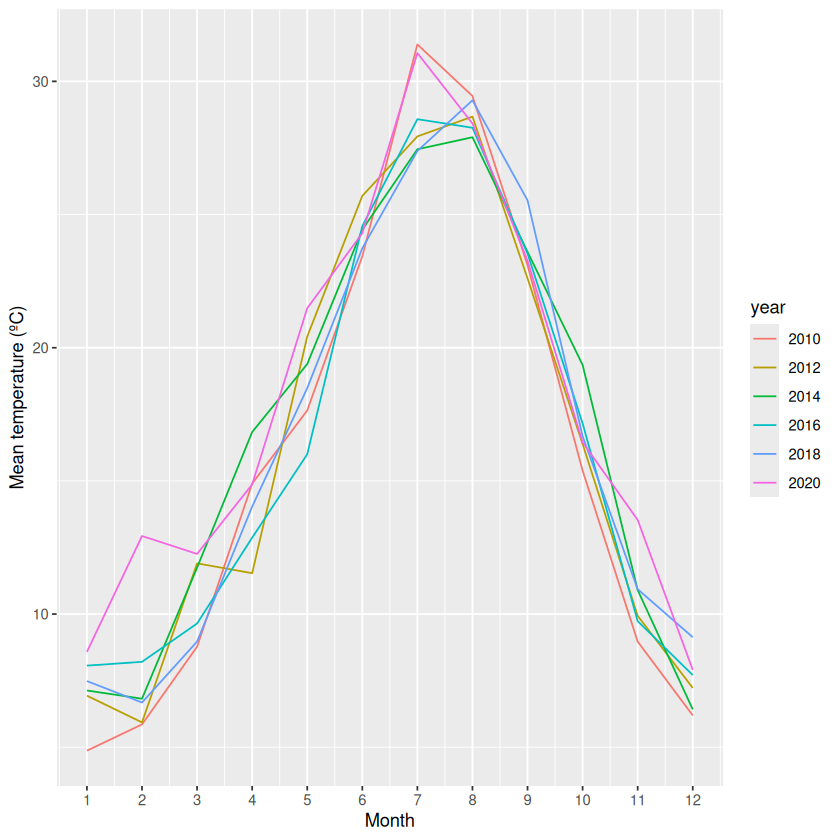

In [28]:
madrid_weather_monthly %>% 
  ggplot(aes(x = month, y = mean_temp, colour = year)) +
  geom_line() +
  scale_x_continuous(breaks = seq(month.abb)) +
  labs(x = "Month", y = "Mean temperature (ºC)")

#### 1.6 Export the plot
Use ggsave to export the plots as "madrid_monthly_temperature.png" in the "outputs"\
folder\
Examine it outside of RStudio.

In [29]:
ggsave (filename = '../outputs/madrid_monthly_temperature.png')

Saving 7 x 7 in image


# 2 Extra exercises ----
# lung_disease_deaths.tsv contains monthly deaths from bronchitis, emphysema and 
# asthma in the UK, 1974–1979, for males and females

# Make a line plot of the month deaths by year and gender
# You will need think about
# - dataset shape
# - unique groups
# - controlling value ordering .. month.abb can help you here

# What trend in the data do you see?
# Which months do most deaths occur?
# Is it different between sexes?
# Are there differences across years?
deaths <-
  read_delim('data/lung_disease_deaths.tsv')



## Conclusion ----
# We looked at
# - line plots
# - grouping with group and colour
# - creating groups (factors) out of numeric data
# - altering the xaxis
